In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Visualization
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [3]:
df = pd.read_csv('Mall_Customers.csv')


df.head(10) 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

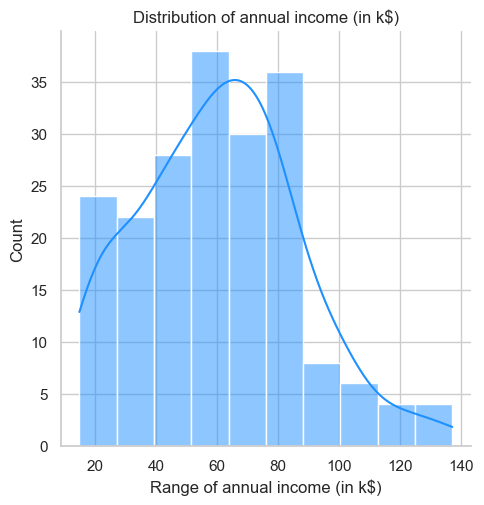

In [7]:

sns.set(style="whitegrid")
sns.displot(df["Annual Income (k$)"], kde=True, color="dodgerblue")

plt.title("Distribution of annual income (in k$)")
plt.xlabel("Range of annual income (in k$)")
plt.ylabel("Count")

plt.show()

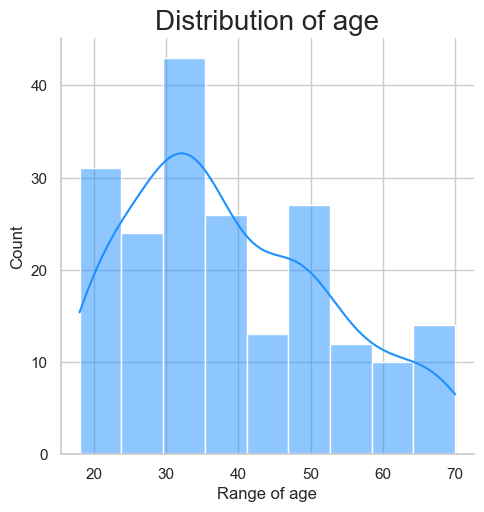

In [8]:
sns.set(style="whitegrid")
sns.displot(df["Age"], kde=True, color="dodgerblue")

plt.title('Distribution of age', fontsize = 20)
plt.xlabel('Range of age')
plt.ylabel('Count')

plt.show()

C:\Users\ESHOP\AppData\Local\Temp\ipykernel_13888\117107093.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genders.index, y=genders.values, palette=colors)


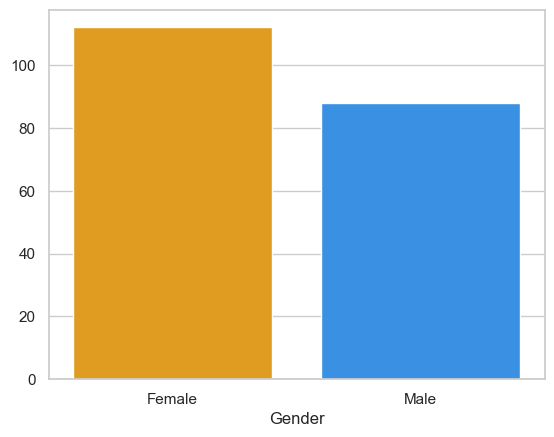

In [9]:
genders = df["Gender"].value_counts()

colors = {
    "Male": "dodgerblue",
    "Female": "ORANGE"
}

sns.set(style="whitegrid")
sns.barplot(x=genders.index, y=genders.values, palette=colors)

plt.show()

In [10]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


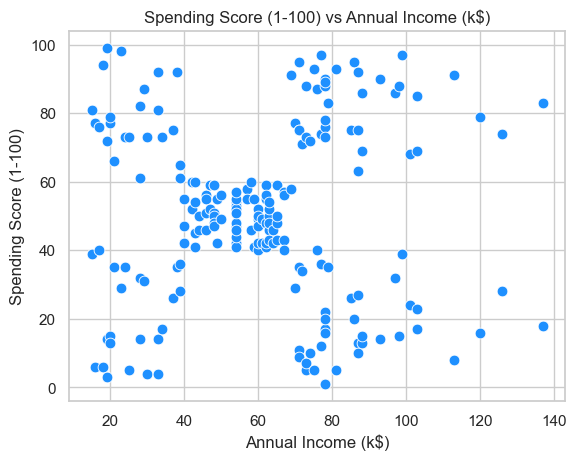

In [11]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=X, s=60, color="dodgerblue")

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')

plt.show()


C:\Users\ESHOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ESHOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ESHOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ESHOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

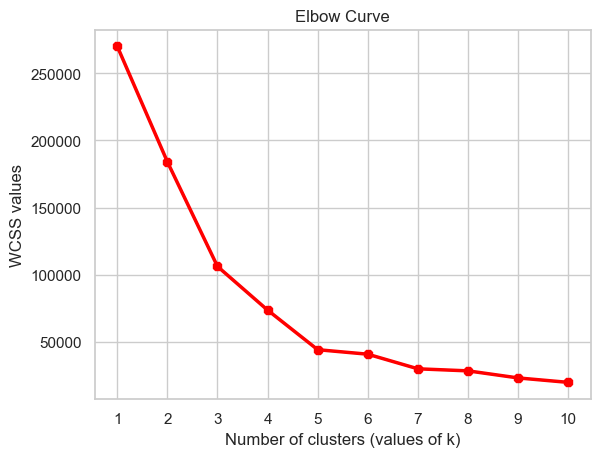

In [12]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(X)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")
plt.xticks(np.arange(1, 11, 1))

plt.show()

In [13]:
# taking k = 5
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(X)

# predicting the labels of the input data
y_pred = k_means_1.predict(X)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

C:\Users\ESHOP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


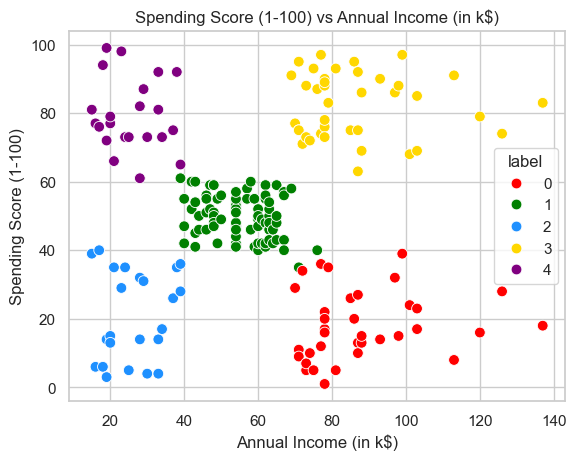

In [16]:
colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()